<a href="https://colab.research.google.com/github/lklmkv/tvp1t/blob/main/Missings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About dataset**

Missing Migrants Project tracks deaths of migrants, including refugees and asylum-seekers, who have gone missing along mixed migration routes worldwide. The research behind this project began with the October 2013 tragedies, when at least 368 individuals died in two shipwrecks near the Italian island of Lampedusa. Since then, Missing Migrants Project has developed into an important hub and advocacy source of information that media, researchers, and the general public access for the latest information.

The database includes deaths and disappearances of migrants who die in transportation accidents, shipwrecks,
violent attacks, or due to medical complications during their journeys.

In this notebook, we will use this dataset to show how we can work with missing values and visualize them.

First of all, let's load the data and see the descriptive statistics and main information about it.

In [74]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
df = pd.read_csv('MissingMigrants-Global-2019-12-31_correct.csv')
print(df.info())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5987 entries, 0 to 5986
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Web ID                               5987 non-null   int64  
 1   Region of Incident                   5987 non-null   object 
 2   Reported Date                        5987 non-null   object 
 3   Reported Year                        5987 non-null   int64  
 4   Reported Month                       5987 non-null   object 
 5   Number Dead                          5762 non-null   float64
 6   Minimum Estimated Number of Missing  576 non-null    float64
 7   Total Dead and Missing               5987 non-null   int64  
 8   Number of Survivors                  914 non-null    float64
 9   Number of Females                    1058 non-null   float64
 10  Number of Males                      3286 non-null   float64
 11  Number of Children            

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
count,5987.000000,5987,5987,5987.000000,5987,5762.000000,576.000000,5987.000000,914.000000,1058.000000,3286.000000,753.000000,5987,5977,5985,5986,2931,3810,5941,5987.000000
unique,NaN,15,1756,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266,3379,1658,4124,15,2468,20,NaN
top,NaN,US-Mexico Border,"March 20, 2016",NaN,Jun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drowning,"Pima County jurisdiction, Arizona, USA",Mixed Migration Monitoring Mechanism Initiativ...,"31.965203600000, -113.011894500000",Central America to US,http://www.mixedmigration.org/4mi/,Northern America,NaN
freq,NaN,1612,27,NaN,607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1151,169,1056,156,1649,806,1310,NaN
mean,44220.795891,NaN,NaN,2016.912143,NaN,3.208782,26.776042,5.664273,56.247265,1.984877,1.842970,2.346614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.934525
std,5630.217519,NaN,NaN,1.377580,NaN,13.037592,64.005246,26.694092,134.411900,2.897452,5.166482,9.458373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.416122
min,30158.000000,NaN,NaN,2014.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,41043.500000,NaN,NaN,2016.000000,NaN,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,43842.000000,NaN,NaN,2017.000000,NaN,1.000000,6.000000,1.000000,14.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,49262.500000,NaN,NaN,2018.000000,NaN,2.000000,22.250000,3.000000,52.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


Let's visually look at the presence of gaps in the data. Do this  with the **missingno** library.

<Axes: >

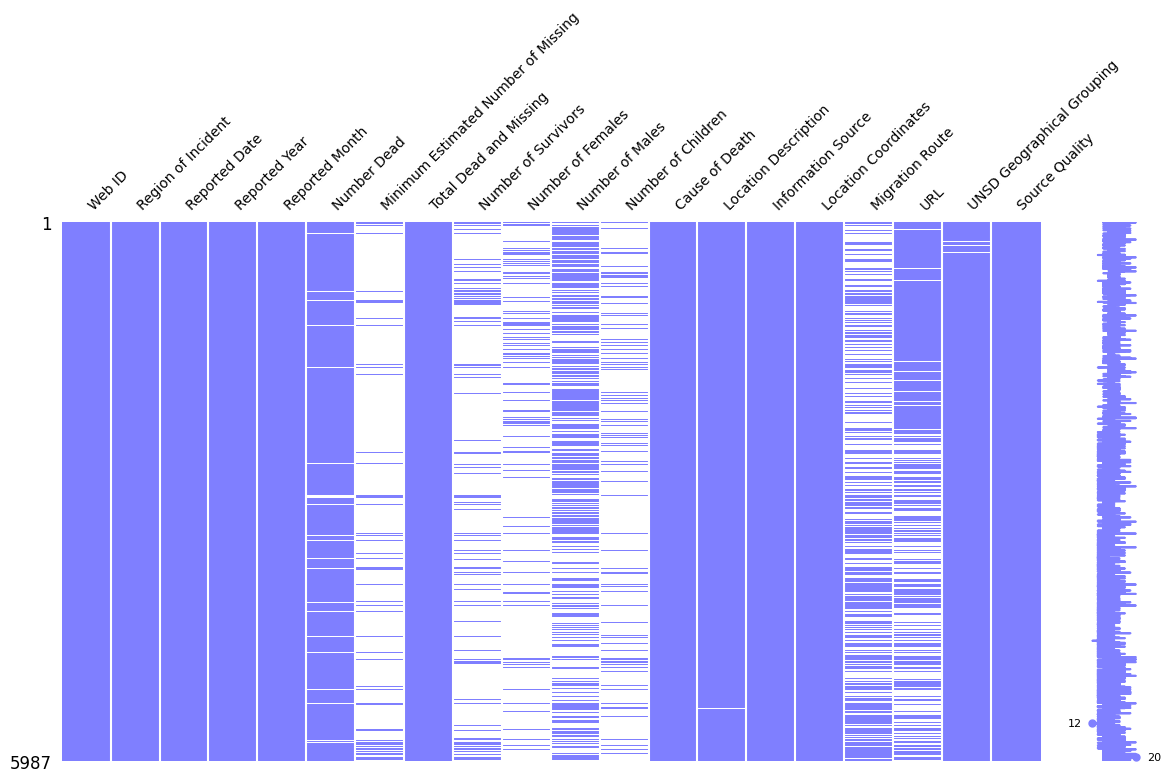

In [75]:
import missingno as msno

msno.matrix(df, figsize=(14,7), fontsize=10, color=(0.5, 0.5, 1.0))

The distribution of missing values ​​in the dataset looks random; a pattern would be missing values, for example, only in the first half of observations.

Let's calculate the **number** and **percentage** of missing values ​​in each column.

In [76]:
data_missing = pd.DataFrame(index = df.columns.values)
data_missing['Null'] = df.isnull().sum().values
data_missing['Null percentage'] = (df.isna().sum() / len(df)).round(4) * 100
data_missing

,Null,Null percentage
Web ID,0,0.00
Region of Incident,0,0.00
Reported Date,0,0.00
Reported Year,0,0.00
Reported Month,0,0.00
Number Dead,225,3.76
Minimum Estimated Number of Missing,5411,90.38
Total Dead and Missing,0,0.00
Number of Survivors,5073,84.73
Number of Females,4929,82.33


Here we can see that features 'Location Description', 'Information Source', 'Location Coordinates', 'UNSD Geographical Grouping', and  'Number Dead' have less than 4% of missing values.

That's why dropping the rows with missing values in these columns will not cause a big data quality loss.

In [77]:
df = df.dropna(subset=['Location Description', 'Information Source',
                       'Location Coordinates', 'UNSD Geographical Grouping', 'Number Dead'])

Let's visualize the distribution of values in features 'Minimum Estimated Number of Missing', 'Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children'.

array([[<Axes: title={'center': 'Minimum Estimated Number of Missing'}>,
        <Axes: title={'center': 'Number of Survivors'}>],
       [<Axes: title={'center': 'Number of Females'}>,
        <Axes: title={'center': 'Number of Males'}>],
       [<Axes: title={'center': 'Number of Children'}>, <Axes: >]],
      dtype=object)

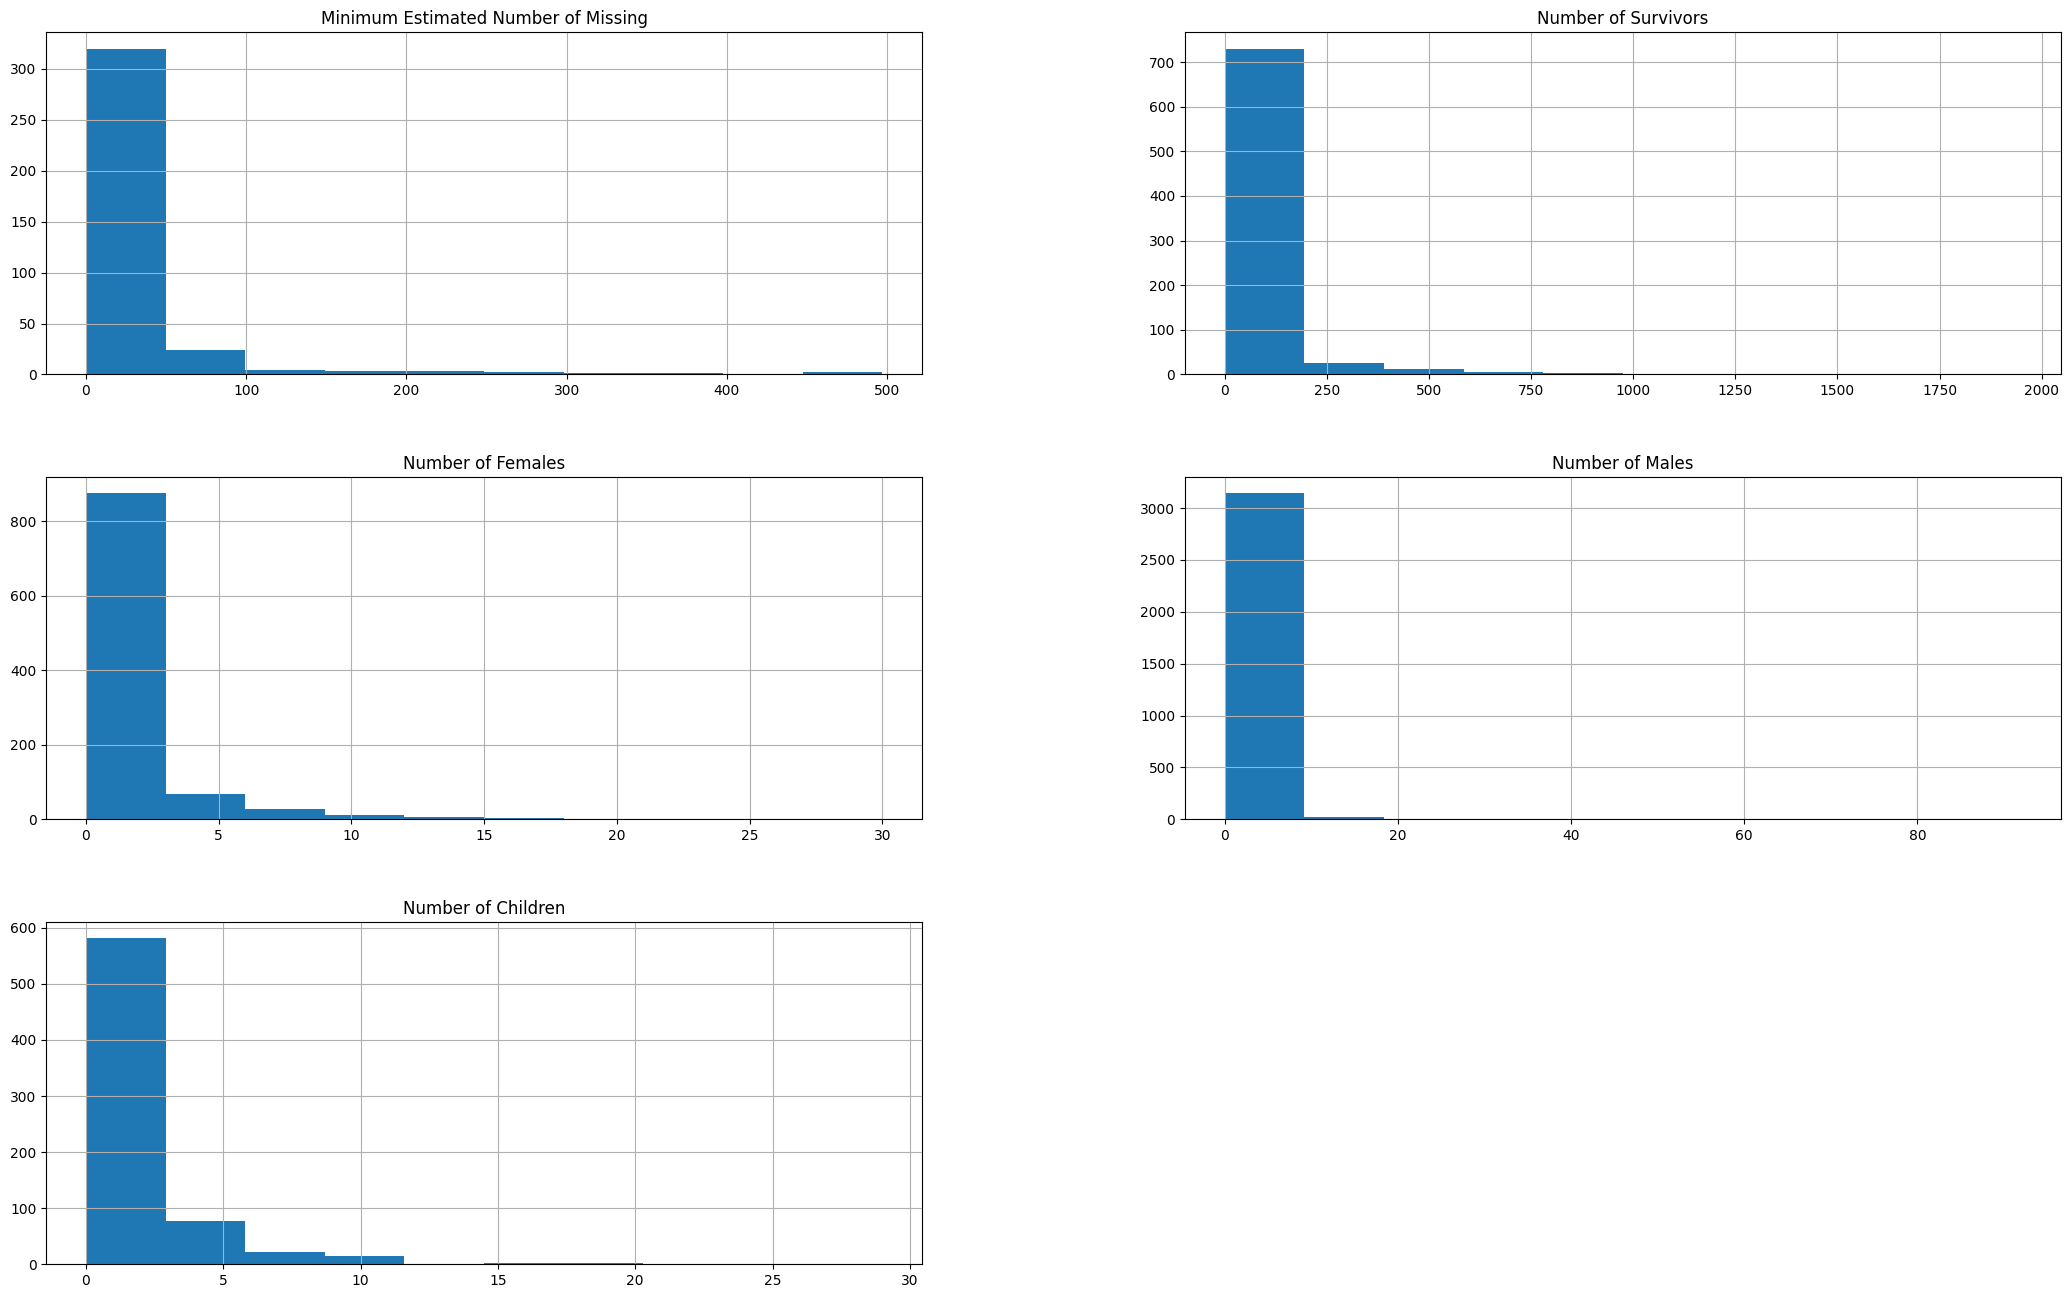

In [78]:
features = ['Minimum Estimated Number of Missing', 'Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children']
df[features].hist(figsize = (26, 16))

In the table with the percentage of missing values in each column, we can see that features 'URL' and  'Migration Route' have a large amount of gaps. These columns include the name of the migrant route on which the incident occurred and the URL of the media source.

In this case, we can drop these features as non-informative.

In [79]:
df = df.drop(columns=['URL',  'Migration Route'])

Let's visualize gaps in the data again.

<Axes: >

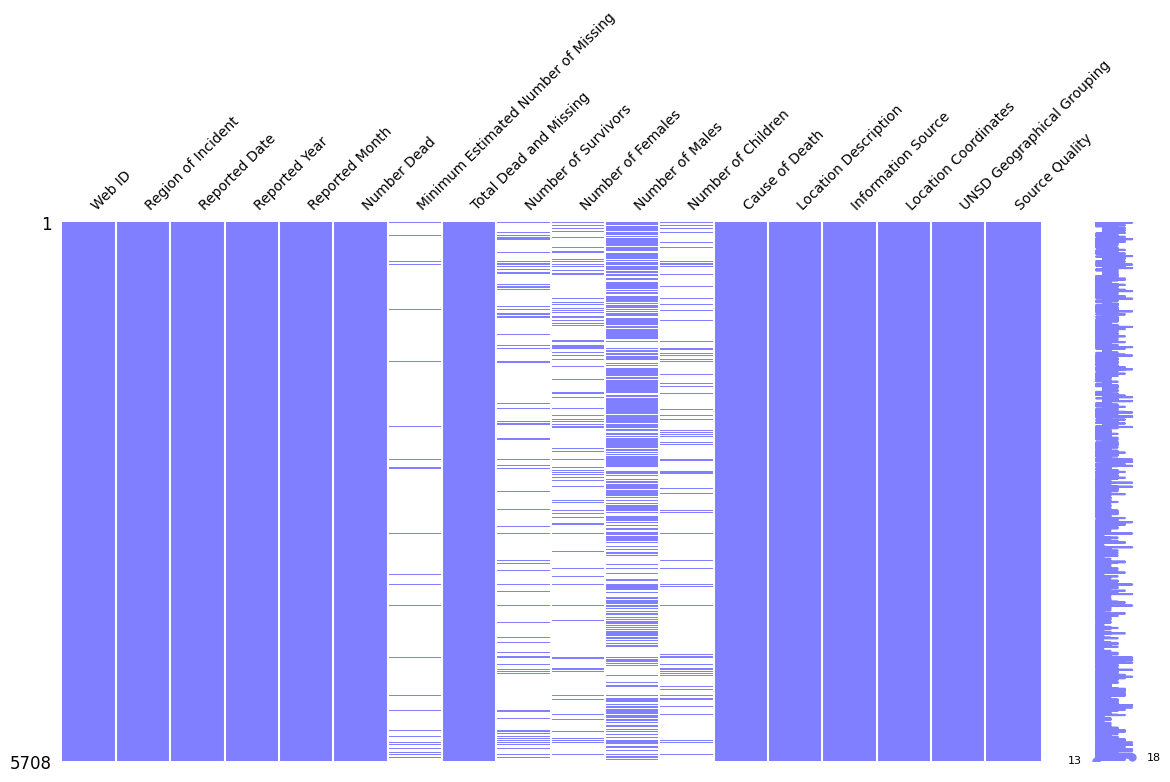

In [80]:
msno.matrix(df, figsize=(14,7), fontsize=10, color=(0.5, 0.5, 1.0))

Based on the distribution histograms, we will fill in the gaps in the remaining columns with **modal** values.

<class 'pandas.core.frame.DataFrame'>
Index: 5708 entries, 0 to 5986
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Web ID                               5708 non-null   int64  
 1   Region of Incident                   5708 non-null   object 
 2   Reported Date                        5708 non-null   object 
 3   Reported Year                        5708 non-null   int64  
 4   Reported Month                       5708 non-null   object 
 5   Number Dead                          5708 non-null   float64
 6   Minimum Estimated Number of Missing  5708 non-null   float64
 7   Total Dead and Missing               5708 non-null   int64  
 8   Number of Survivors                  5708 non-null   float64
 9   Number of Females                    5708 non-null   float64
 10  Number of Males                      5708 non-null   float64
 11  Number of Children                 

<Axes: >

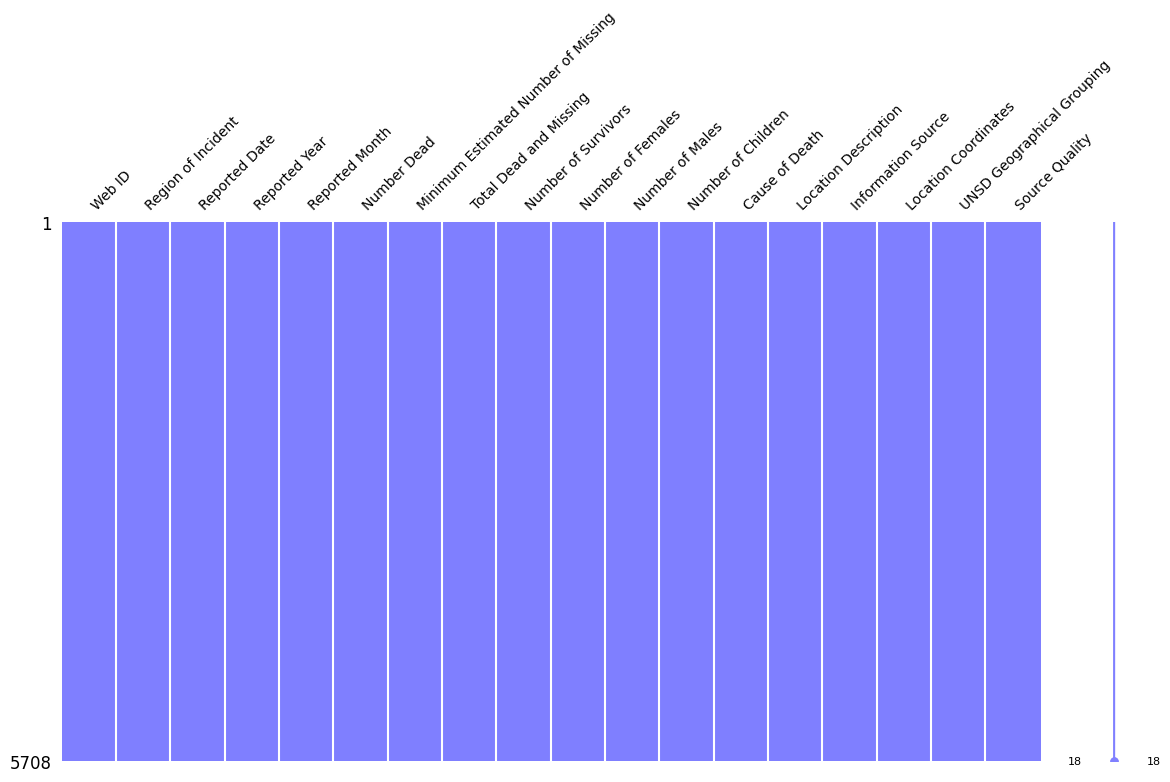

In [81]:
df = df.fillna(0)
print(df.info())
msno.matrix(df, figsize=(14,7), fontsize=10, color=(0.5, 0.5, 1.0))

In this notebook, we handled missing values and prepared the dataset for our next work.